In [188]:
#!pip install sklearn #jika belum punya library untuk mengeksekusi Naive Bayes dan algoritma machine learning lainnya

In [189]:
#!pip install imblearn #jika belum punya library imblearn untuk resampling dataset

In [190]:
#!pip install nltk #untuk membersihkan teks (proses NLP)

Note: semua library di atas bisa langsung diinstall di jupyter notebook, cukup hapus tanda # dibagian paling kiri 
lalu klik run

In [1]:
#mengimport library yang dibutuhkan
import numpy as np 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset= pd.read_csv("labeling_dataset.csv")

In [3]:
dataset

,full_text,sentimen,kategori
0,"Pada masa pandemi COVID 19 mendera, pembelajar...",positif,Confidience
1,@sultohn @Trollbukantroll @nandadaus @kpertiwi...,positif,Composure
2,"Semenjak pandemi covid-19, penggunaan berbagai...",positif,Control
3,"Dimasa pandemi covid, semua ruang gerak dibata...",positif,Comitment
4,"Saat pandemi covid-19, proses pembelajaran dil...",positif,Comitment
...,...,...,...
1065,"MY BEST, APLIKASI PEMBELAJARAN GA PAKE RIBET\n...",negatif,Comitment
1066,Hari Pendidikan Nasional Saat Pandemi COVID-19...,positif,Control
1067,Pesan Mendikbud di Hari Pendidikan Nasional Sa...,positif,Control
1068,Sekolah Karakter GIS kembangkan pendidikan men...,positif,Confidience


In [4]:
#pengecekan missing values
dataset.isna().sum()

full_text    2
sentimen     2
kategori     6
dtype: int64

In [5]:
dataset.replace('\?', np.nan, regex = True, inplace = True) #untuk menghilangkan ambiguitas, maka semua tanda "\?" atau karakter yang tidak dikenali diganti ke NaN

In [6]:
dataset.isna().sum() #missing value akhir

full_text    77
sentimen      2
kategori      6
dtype: int64

In [7]:
dataset= dataset.dropna()

In [8]:
dataset.isna().sum()

full_text    0
sentimen     0
kategori     0
dtype: int64

In [9]:
dataset

,full_text,sentimen,kategori
0,"Pada masa pandemi COVID 19 mendera, pembelajar...",positif,Confidience
2,"Semenjak pandemi covid-19, penggunaan berbagai...",positif,Control
3,"Dimasa pandemi covid, semua ruang gerak dibata...",positif,Comitment
4,"Saat pandemi covid-19, proses pembelajaran dil...",positif,Comitment
5,📚Departemen Hubungan Internasional📚\n\nSebagai...,positif,Comitment
...,...,...,...
1065,"MY BEST, APLIKASI PEMBELAJARAN GA PAKE RIBET\n...",negatif,Comitment
1066,Hari Pendidikan Nasional Saat Pandemi COVID-19...,positif,Control
1067,Pesan Mendikbud di Hari Pendidikan Nasional Sa...,positif,Control
1068,Sekolah Karakter GIS kembangkan pendidikan men...,positif,Confidience


In [10]:
#mengecek tipe kategori dari sentimen
dataset['kategori'].value_counts()

Composure      307
Comitment      275
Control        243
Confidience    165
Name: kategori, dtype: int64

In [12]:
#visualisasi
import seaborn as sns

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


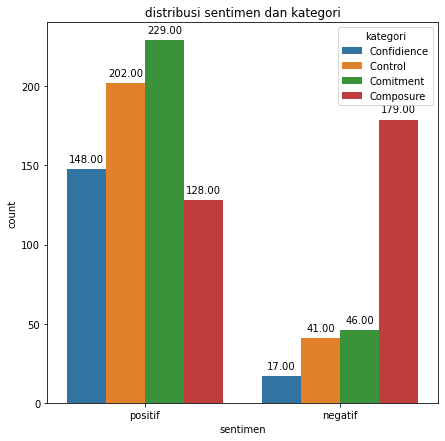

In [13]:
plt.figure(figsize=(7,7))
sc= sns.countplot(dataset['sentimen'],hue=dataset['kategori'])
for p in sc.patches:
    sc.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("distribusi sentimen dan kategori");

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kategori', ylabel='count'>

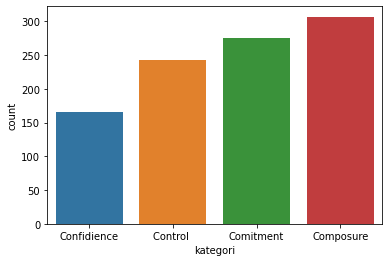

In [14]:
#visualisasi kategori sentimen
sns.countplot(dataset['kategori'])

dari grafik di atas tampak bahwa terjadi ketidakseimbangan kelas, maka dari itu dilakukan suatu penanganan, dalam hal ini 
dilakukan teknik resampling (RUS= Random Over Sampling). Namun proses ini akan dilakukan pada sesi terpisah, agar kita dapat melihat perbandingan nilai akurasi dari model Naive Bayes, sebelum dan setelah dilakukan resampling

Untuk step selanjutnya dilakukan transformasi dari data kategorical ke numerical terlebih dahulu

In [14]:
#transformasi variabel categorical menjadi numerical
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
label_encoder= LabelEncoder()

dataset['sentimen']= label_encoder.fit_transform(dataset['sentimen'])
dataset['kategori']= label_encoder.fit_transform(dataset['kategori'])


C:\Users\ACER\AppData\Local\Temp\ipykernel_1332\3127710095.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['sentimen']= label_encoder.fit_transform(dataset['sentimen'])
C:\Users\ACER\AppData\Local\Temp\ipykernel_1332\3127710095.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['kategori']= label_encoder.fit_transform(dataset['kategori'])


In [15]:
dataset 

,full_text,sentimen,kategori
0,"Pada masa pandemi COVID 19 mendera, pembelajar...",1,2
2,"Semenjak pandemi covid-19, penggunaan berbagai...",1,3
3,"Dimasa pandemi covid, semua ruang gerak dibata...",1,0
4,"Saat pandemi covid-19, proses pembelajaran dil...",1,0
5,📚Departemen Hubungan Internasional📚\n\nSebagai...,1,0
...,...,...,...
1065,"MY BEST, APLIKASI PEMBELAJARAN GA PAKE RIBET\n...",0,0
1066,Hari Pendidikan Nasional Saat Pandemi COVID-19...,1,3
1067,Pesan Mendikbud di Hari Pendidikan Nasional Sa...,1,3
1068,Sekolah Karakter GIS kembangkan pendidikan men...,1,2


In [16]:
X=dataset['full_text'].values #variabel independen

In [17]:
y=dataset['kategori'].values #variabel output (dependen) dalam hal ini berupa 4 kategori sentimen

# Melakukan pembersihan text

pemebresihan teks perlu dilakukan agar teks bisa diproses lebih lanjut, beberapa step yang dilakukan adalah penghapusan tanda baca seperti : koma, titik tanda kutip dsb.

In [18]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 990): #isi range harus sesuai dengan berapa banyak row data yang dimiliki, (awalnya 1070, namun setelah didrop missing valuenya menjadi 990)
  review = re.sub('[^a-zA-Z]', ' ', X[i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
print(corpus)

['pada masa pandemi covid mendera pembelajaran lure offlin berubah menjadi dare onlin dengan segala konsekuensinya', 'semenjak pandemi covid penggunaan berbagai platform untuk pembelajaran onlin semakin meningkat selain membantu prose pembelajaran juga dapat meningkatkan skill dalam bidang teknolog digit apagunadigit onlineuntukapa http co osytpwygmx', 'dimasa pandemi covid semua ruang gerak dibatasi termasuk pembelajaran dimana semua dipaksa menggunakan teknolog onlin untuk tetap pembelajaran agar para siswa tidak tertingg apagunadigit onlineuntukapa http co bc hhew c', 'saat pandemi covid prose pembelajaran dilakukan dengan cara onlin karena itu literasi digit sangat diperlukan bagi pengajar untuk diterapkan sejak dini platejohnni kemkominfo http co ctfji iolj', 'departemen hubungan internasion sebagai konsiderasi ata dampak yang ditimbulkan oleh pandemi covid hingga mengharuskan terselenggarakannya pembelajaran kuliah onlin yang memakan waktu cukup banyak di depan layar para dosen d

# ## Creating the Bag of Words model

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X_ = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [21]:
X_

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# splitting dataset

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.20, random_state = 0)

# Training Dan Testing Dataset 

In [23]:
#mengimport modul untuk eksekusi algoritma Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(X_train, y_train) #melatih model dari data training yang ada

GaussianNB()

In [24]:
#testing dan prediksi
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) #output

[[0 3]
 [3 0]
 [0 0]
 [3 2]
 [3 1]
 [2 2]
 [2 1]
 [0 3]
 [0 2]
 [1 0]
 [0 3]
 [1 1]
 [0 0]
 [1 0]
 [3 3]
 [0 0]
 [1 1]
 [2 0]
 [1 3]
 [1 2]
 [2 0]
 [1 1]
 [3 3]
 [1 1]
 [0 1]
 [2 1]
 [1 1]
 [0 1]
 [0 0]
 [2 1]
 [0 3]
 [3 2]
 [3 3]
 [3 0]
 [3 3]
 [0 0]
 [2 3]
 [3 2]
 [2 0]
 [2 1]
 [2 1]
 [3 3]
 [0 0]
 [3 1]
 [0 1]
 [3 3]
 [1 2]
 [0 1]
 [2 2]
 [2 0]
 [0 0]
 [2 3]
 [0 0]
 [1 2]
 [3 3]
 [3 3]
 [3 1]
 [3 0]
 [2 0]
 [3 0]
 [2 2]
 [0 2]
 [2 0]
 [3 0]
 [2 1]
 [1 2]
 [2 0]
 [2 2]
 [2 3]
 [3 1]
 [2 2]
 [1 1]
 [0 1]
 [3 1]
 [1 3]
 [3 1]
 [2 3]
 [2 2]
 [0 2]
 [2 1]
 [3 3]
 [2 1]
 [2 1]
 [3 0]
 [0 0]
 [0 2]
 [2 2]
 [1 1]
 [1 3]
 [3 3]
 [1 2]
 [2 2]
 [0 3]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 3]
 [3 2]
 [0 1]
 [2 2]
 [3 0]
 [3 1]
 [1 2]
 [2 1]
 [2 2]
 [1 0]
 [0 1]
 [2 0]
 [0 1]
 [3 3]
 [0 3]
 [3 0]
 [3 3]
 [1 3]
 [3 0]
 [1 1]
 [1 0]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [0 2]
 [3 0]
 [2 3]
 [1 0]
 [0 0]
 [3 1]
 [2 3]
 [0 2]
 [0 0]
 [1 1]
 [2 1]
 [3 1]
 [2 1]
 [0 0]
 [3 0]
 [0 1]
 [0 0]
 [2 1]
 [2 1]
 [0 3]
 [2 1]

In [25]:
#kalkulasi akurasi 
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("skor akurasi adalah : ", accuracy_score(y_test,y_pred))

[[14 11 10 14]
 [13 17 21 11]
 [ 9 10 12  8]
 [10  5  9 24]]
skor akurasi adalah :  0.3383838383838384


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.29      0.29        49
           1       0.40      0.27      0.32        62
           2       0.23      0.31      0.26        39
           3       0.42      0.50      0.46        48

    accuracy                           0.34       198
   macro avg       0.34      0.34      0.33       198
weighted avg       0.35      0.34      0.34       198



# mari kita coba melakukan resampling

In [28]:
from imblearn.over_sampling import RandomOverSampler

In [29]:
X_= dataset['full_text'].values.reshape(-1,1)

In [30]:
y= dataset['kategori']

In [31]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_, y)

print("terdapat", X_ros.shape[0] - X.shape[0], 'titik/raw data yang di-resampling')

terdapat 238 titik/raw data yang di-resampling


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kategori', ylabel='count'>

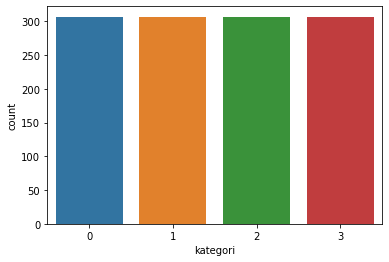

In [32]:
#mengecek distribusi data keseimbangan data
sns.countplot(y_ros) #dapat dilihat bahwa data telah seimbang

In [33]:
#mengecek jumlah rawdata
data_sampling = pd.DataFrame({"kategori": y_ros})
data_sampling

,kategori
0,2
1,3
2,0
3,0
4,0
...,...
1223,3
1224,3
1225,3
1226,3


Terdapat 1228 raw data, informasi ini penting untuk eksekusi text pada blok di bawah

In [34]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1228): #isi range harus sesuai dengan berapa banyak row data yang dimiliki, (awalnya 1070, namun setelah didrop missing valuenya menjadi 990)
  review = re.sub('[^a-zA-Z]', ' ', str(X_ros[i])) #sumbu X harus berbentuk string sehingga X-ros dicovert menjadi string
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X_ = cv.fit_transform(corpus).toarray()
y = y_ros

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.20, random_state = 0)

In [37]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
#kita tabulasi nilai sebenarnya dan nilai prediksi

output= pd.DataFrame({"nilai_sebenarnya" : y_test, "hasil_prediksi" : y_pred})
output

,nilai_sebenarnya,hasil_prediksi
18,0,3
546,3,0
268,1,1
1221,3,3
874,2,3
...,...,...
945,1,0
283,3,1
349,1,0
333,1,2


In [40]:
#agar lebih jelas secara matematis,maka dilakukan perhitungan akurasi dengan confussion matriks dan akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("tingkat akurasi prediksi dengan naive bayes adalah :", accuracy_score(y_test, y_pred))

[[19 12  9 18]
 [16 16  8 18]
 [ 8  6 42 11]
 [ 6  9  3 45]]
tingkat akurasi prediksi dengan naive bayes adalah : 0.4959349593495935


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.33      0.36        58
           1       0.37      0.28      0.32        58
           2       0.68      0.63      0.65        67
           3       0.49      0.71      0.58        63

    accuracy                           0.50       246
   macro avg       0.48      0.49      0.48       246
weighted avg       0.49      0.50      0.48       246

